In [1]:
#Task: predict percentage of student based on the number of hours studies
#We are going to build a linear regression model to predict the score with and without using in-build libraries.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df=pd.read_csv('/content/hours_of_study.csv')

In [62]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [63]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [65]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [66]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [67]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [68]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [69]:
X=df['Hours']

In [70]:
Y=df['Scores']

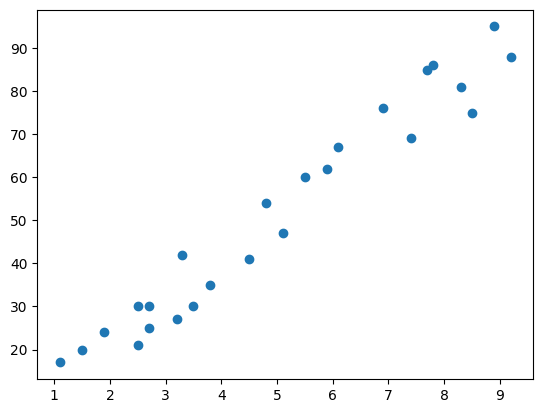

In [71]:
plt.scatter(X,Y)

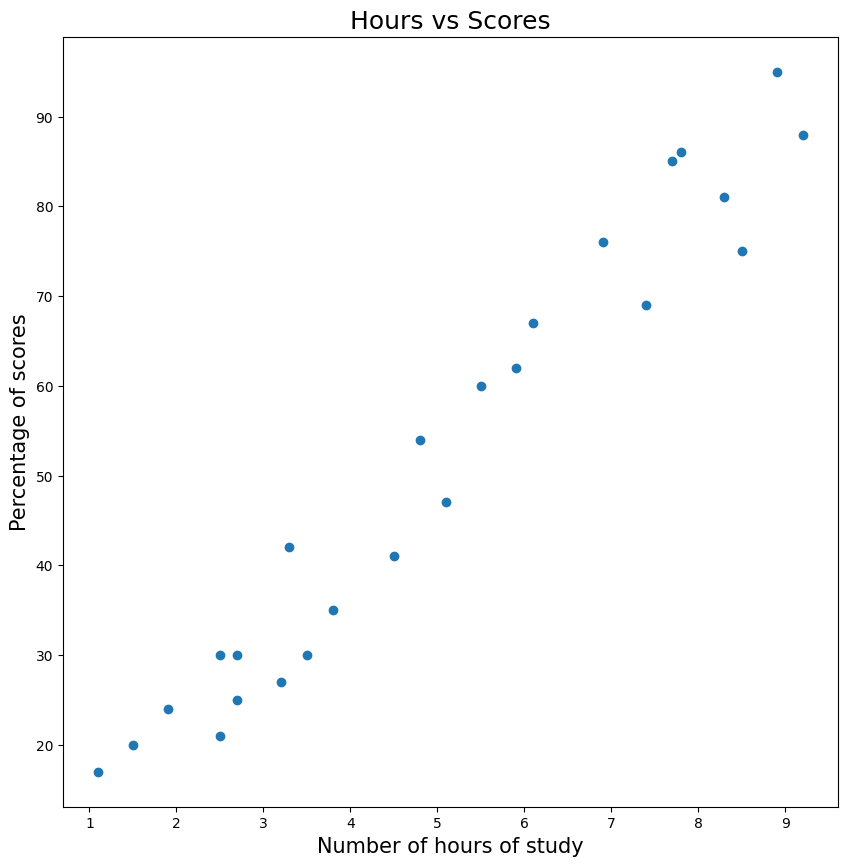

In [56]:
plt.figure(figsize = (10,10))
plt.scatter(X, Y)
plt.xlabel('Number of hours of study', fontsize=15)
plt.ylabel('Percentage of scores', fontsize=15)
plt.title('Hours vs Scores', fontsize=18)
plt.show()

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [73]:
model=LinearRegression()

In [74]:
X=df["Hours"].values
X_all=X.reshape(-1,1)


In [75]:
model.fit(X_all,Y)

LinearRegression()

In [76]:
Y_pred=model.predict(X_all)

In [77]:
Y_pred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [78]:
Y_pred[9],Y[9]

(28.878342560499377, 25)

In [79]:
print(f'Intercept: {model.intercept_}')

Intercept: 2.48367340537321


In [80]:
print(f'Slope: {model.coef_}')

Slope: [9.77580339]


In [81]:
print(f'MSE: {np.sqrt(mean_squared_error(Y,Y_pred))}')

MSE: 5.374265578592619


In [82]:
print(f'R-squared score: {r2_score(Y,Y_pred)}')

R-squared score: 0.9529481969048356


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, train_size=0.7, test_size=0.3,
                                                    random_state=21, shuffle=True)

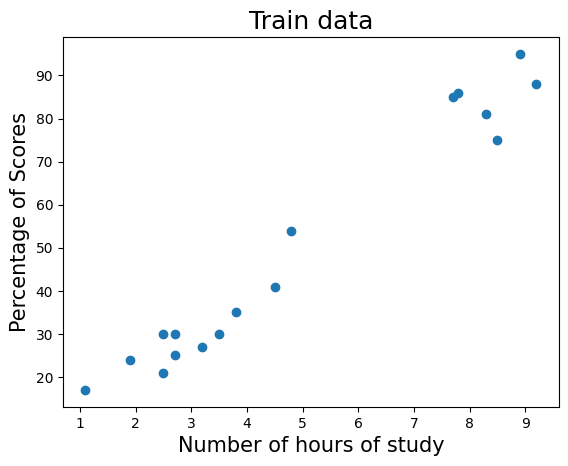

In [84]:
plt.scatter(X_train, y_train)
plt.title('Train data', fontsize=18)
plt.xlabel('Number of hours of study', fontsize=15)
plt.ylabel('Percentage of Scores', fontsize=15)
plt.show()

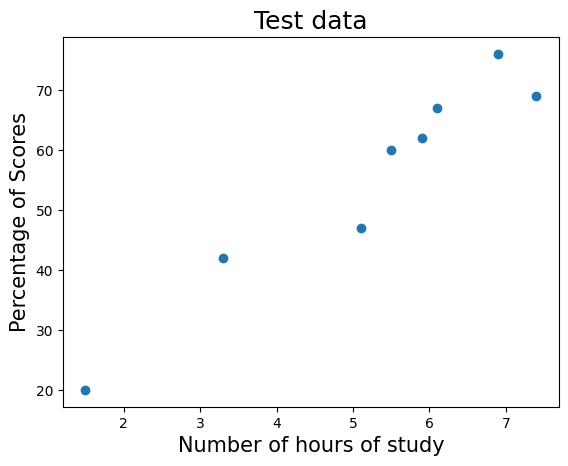

In [85]:
plt.scatter(X_test, y_test)
plt.title('Test data', fontsize=18)
plt.xlabel('Number of hours of study', fontsize=15)
plt.ylabel('Percentage of Scores', fontsize=15)
plt.show()

In [86]:
model_train_test = LinearRegression()

In [87]:
model_train_test.fit(X_train, y_train)

LinearRegression()

In [88]:
y_pred_traintest = model_train_test.predict(X_test)

In [89]:
y_pred_traintest

array([51.45158853, 61.3473966 , 33.639134  , 15.82667948, 55.40991176,
       74.21194709, 69.26404306, 59.36823499])

In [90]:
xmean=X.mean()
df['diffx']=X-xmean
df['diffx_squared']=df.diffx**2
SSxx=df.diffx_squared.sum()
ymean=Y.mean()
df['diffy']=Y-ymean
SSxy=(df.diffx*df.diffy).sum()
df

,Hours,Scores,diffx,diffx_squared,diffy
0,2.5,21,-2.512,6.310144,-30.48
1,5.1,47,0.088,0.007744,-4.48
2,3.2,27,-1.812,3.283344,-24.48
3,8.5,75,3.488,12.166144,23.52
4,3.5,30,-1.512,2.286144,-21.48
5,1.5,20,-3.512,12.334144,-31.48
6,9.2,88,4.188,17.539344,36.52
7,5.5,60,0.488,0.238144,8.52
8,8.3,81,3.288,10.810944,29.52
9,2.7,25,-2.312,5.345344,-26.48


In [91]:
m=SSxy/SSxx
b=ymean-m*xmean

In [92]:
def predicted_percentage_score(value):
  predict = m*value+b
  return predict

In [93]:
print("The perctange score of a student based on the {} hours of study is : {}".format(9.25,predicted_percentage_score(9.25)))

The perctange score of a student based on the 9.25 hours of study is : 92.90985477015731


In [95]:
hours=int(input("Enter the number of hours: "))
print("The perctange score of a student based on the {} hours of study is : {}".format(hours,predicted_percentage_score(hours)))

Enter the number of hours: 8
The perctange score of a student based on the 8 hours of study is : 80.69010053167297
